Step 1 - Data Preprocessing:

In [124]:
%pip install pandas matplotlib seaborn
%pip install nbformat
%pip install scikit-learn 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [125]:
import numpy as np
import pandas as pd

In [126]:
# read the data
df_dataset = pd.read_csv("/Users/user/Documents/Study/2023-1/gr2/cicids2018/03-02-2018.csv", low_memory=False)

In [127]:
df_dataset

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3389,6,02/03/2018 02:08:18,3982183,14,8,1442,1731.0,725,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1048571,3389,6,02/03/2018 02:08:22,3802316,14,8,1440,1731.0,725,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1048572,3389,6,02/03/2018 02:08:25,4004239,14,8,1459,1731.0,741,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1048573,3389,6,02/03/2018 02:08:29,3998435,14,8,1459,1731.0,741,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [128]:
df_dataset['Dst Port'] = df_dataset['Dst Port'].astype(int)
df_dataset['Protocol'] = df_dataset['Protocol'].astype(int)
df_dataset['Flow Duration'] = df_dataset['Flow Duration'].astype(int)
df_dataset['Tot Fwd Pkts'] = df_dataset['Tot Fwd Pkts'].astype(int)
df_dataset['Tot Bwd Pkts'] = df_dataset['Tot Bwd Pkts'].astype(int)
df_dataset['TotLen Fwd Pkts'] = df_dataset['TotLen Fwd Pkts'].astype(int)
df_dataset['TotLen Bwd Pkts'] = df_dataset['TotLen Bwd Pkts'].astype(int)
df_dataset['Fwd Pkt Len Max'] = df_dataset['Fwd Pkt Len Max'].astype(int)
df_dataset['Fwd Pkt Len Min'] = df_dataset['Fwd Pkt Len Min'].astype(int)
df_dataset['Fwd Pkt Len Mean'] = df_dataset['Fwd Pkt Len Mean'].astype(float)
df_dataset['Fwd Pkt Len Std'] = df_dataset['Fwd Pkt Len Std'].astype(float)
df_dataset['Bwd Pkt Len Max'] = df_dataset['Bwd Pkt Len Max'].astype(int)
df_dataset['Bwd Pkt Len Min'] = df_dataset['Bwd Pkt Len Min'].astype(int)
df_dataset['Bwd Pkt Len Mean'] = df_dataset['Bwd Pkt Len Mean'].astype(float)
df_dataset['Bwd Pkt Len Std'] = df_dataset['Bwd Pkt Len Std'].astype(float)
df_dataset['Flow Byts/s'] = df_dataset['Flow Byts/s'].astype(float)
df_dataset['Flow Pkts/s'] = df_dataset['Flow Pkts/s'].astype(float)
df_dataset['Flow IAT Mean'] = df_dataset['Flow IAT Mean'].astype(float)
df_dataset['Flow IAT Std'] = df_dataset['Flow IAT Std'].astype(float)
df_dataset['Flow IAT Max'] = df_dataset['Flow IAT Max'].astype(int)
df_dataset['Flow IAT Min'] = df_dataset['Flow IAT Min'].astype(int)
df_dataset['Fwd IAT Tot'] = df_dataset['Fwd IAT Tot'].astype(int)
df_dataset['Fwd IAT Mean'] = df_dataset['Fwd IAT Mean'].astype(float)
df_dataset['Fwd IAT Std'] = df_dataset['Fwd IAT Std'].astype(float)
df_dataset['Fwd IAT Max'] = df_dataset['Fwd IAT Max'].astype(int)
df_dataset['Fwd IAT Min'] = df_dataset['Fwd IAT Min'].astype(int)
df_dataset['Bwd IAT Tot'] = df_dataset['Bwd IAT Tot'].astype(int)
df_dataset['Bwd IAT Mean'] = df_dataset['Bwd IAT Mean'].astype(float)
df_dataset['Bwd IAT Std'] = df_dataset['Bwd IAT Std'].astype(float)
df_dataset['Bwd IAT Max'] = df_dataset['Bwd IAT Max'].astype(int)
df_dataset['Bwd IAT Min'] = df_dataset['Bwd IAT Min'].astype(int)
df_dataset['Fwd PSH Flags'] = df_dataset['Fwd PSH Flags'].astype(int)
df_dataset['Bwd PSH Flags'] = df_dataset['Bwd PSH Flags'].astype(int)
df_dataset['Fwd URG Flags'] = df_dataset['Fwd URG Flags'].astype(int)
df_dataset['Bwd URG Flags'] = df_dataset['Bwd URG Flags'].astype(int)
df_dataset['Fwd Header Len'] = df_dataset['Fwd Header Len'].astype(int)
df_dataset['Bwd Header Len'] = df_dataset['Bwd Header Len'].astype(int)
df_dataset['Fwd Pkts/s'] = df_dataset['Fwd Pkts/s'].astype(float)
df_dataset['Bwd Pkts/s'] = df_dataset['Bwd Pkts/s'].astype(float)
df_dataset['Pkt Len Min'] = df_dataset['Pkt Len Min'].astype(int)
df_dataset['Pkt Len Max'] = df_dataset['Pkt Len Max'].astype(int)
df_dataset['Pkt Len Mean'] = df_dataset['Pkt Len Mean'].astype(float)
df_dataset['Pkt Len Std'] = df_dataset['Pkt Len Std'].astype(float)
df_dataset['Pkt Len Var'] = df_dataset['Pkt Len Var'].astype(float)
df_dataset['FIN Flag Cnt'] = df_dataset['FIN Flag Cnt'].astype(int)
df_dataset['SYN Flag Cnt'] = df_dataset['SYN Flag Cnt'].astype(int)
df_dataset['RST Flag Cnt'] = df_dataset['RST Flag Cnt'].astype(int)
df_dataset['PSH Flag Cnt'] = df_dataset['PSH Flag Cnt'].astype(int)
df_dataset['ACK Flag Cnt'] = df_dataset['ACK Flag Cnt'].astype(int)
df_dataset['URG Flag Cnt'] = df_dataset['URG Flag Cnt'].astype(int)
df_dataset['CWE Flag Count'] = df_dataset['CWE Flag Count'].astype(int)
df_dataset['ECE Flag Cnt'] = df_dataset['ECE Flag Cnt'].astype(int)
df_dataset['Down/Up Ratio'] = df_dataset['Down/Up Ratio'].astype(int)
df_dataset['Pkt Size Avg'] = df_dataset['Pkt Size Avg'].astype(float)
df_dataset['Fwd Seg Size Avg'] = df_dataset['Fwd Seg Size Avg'].astype(float)
df_dataset['Bwd Seg Size Avg'] = df_dataset['Bwd Seg Size Avg'].astype(float)
df_dataset['Fwd Byts/b Avg'] = df_dataset['Fwd Byts/b Avg'].astype(int)
df_dataset['Fwd Pkts/b Avg'] = df_dataset['Fwd Pkts/b Avg'].astype(int)
df_dataset['Fwd Blk Rate Avg'] = df_dataset['Fwd Blk Rate Avg'].astype(int)
df_dataset['Bwd Byts/b Avg'] = df_dataset['Bwd Byts/b Avg'].astype(int)
df_dataset['Bwd Blk Rate Avg'] = df_dataset['Bwd Blk Rate Avg'].astype(int)
df_dataset['Subflow Fwd Pkts'] = df_dataset['Subflow Fwd Pkts'].astype(int)
df_dataset['Subflow Fwd Byts'] = df_dataset['Subflow Fwd Byts'].astype(int)
df_dataset['Subflow Bwd Pkts'] = df_dataset['Subflow Bwd Pkts'].astype(int)
df_dataset['Subflow Bwd Byts'] = df_dataset['Subflow Bwd Byts'].astype(int)
df_dataset['Init Fwd Win Byts'] = df_dataset['Init Fwd Win Byts'].astype(int)
df_dataset['Init Bwd Win Byts'] = df_dataset['Init Bwd Win Byts'].astype(int)
df_dataset['Fwd Act Data Pkts'] = df_dataset['Fwd Act Data Pkts'].astype(int)
df_dataset['Fwd Seg Size Min'] = df_dataset['Fwd Seg Size Min'].astype(int)
df_dataset['Active Mean'] = df_dataset['Active Mean'].astype(float)
df_dataset['Active Std'] = df_dataset['Active Std'].astype(float)
df_dataset['Active Max'] = df_dataset['Active Max'].astype(int)
df_dataset['Active Min'] = df_dataset['Active Min'].astype(int)
df_dataset['Idle Mean'] = df_dataset['Idle Mean'].astype(float)
df_dataset['Idle Std'] = df_dataset['Idle Std'].astype(float)
df_dataset['Idle Max'] = df_dataset['Idle Max'].astype(int)
df_dataset['Idle Min'] = df_dataset['Idle Min'].astype(int)

print(df_dataset.dtypes)

Dst Port           int64
Protocol           int64
Timestamp         object
Flow Duration      int64
Tot Fwd Pkts       int64
                  ...   
Idle Mean        float64
Idle Std         float64
Idle Max           int64
Idle Min           int64
Label             object
Length: 80, dtype: object


In [129]:
# display data
df_dataset

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773,202,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0,38,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527,385,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141,517,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3389,6,02/03/2018 02:08:18,3982183,14,8,1442,1731,725,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1048571,3389,6,02/03/2018 02:08:22,3802316,14,8,1440,1731,725,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1048572,3389,6,02/03/2018 02:08:25,4004239,14,8,1459,1731,741,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1048573,3389,6,02/03/2018 02:08:29,3998435,14,8,1459,1731,741,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [130]:
# feature information
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

Processing missing data, infinity

In [131]:
# replace +ve and -ve infinity with NaN
df_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

Classifying labels as Benign, Malicious

In [132]:
df_dataset["Label"].value_counts()

Label
Benign    762384
Bot       286191
Name: count, dtype: int64

Taking 100% of the data as a sample

In [133]:
sampled_data = df_dataset
sampled_data["Label"].value_counts()

Label
Benign    762384
Bot       286191
Name: count, dtype: int64

In [134]:
sampled_data.replace(to_replace=["Bot"], value="Malicious", inplace=True)
sampled_data["Label"].value_counts()

Label
Benign       762384
Malicious    286191
Name: count, dtype: int64

Removing duplicate rows

In [135]:
print(sampled_data.duplicated().sum())

5459


In [136]:
sampled_data.drop_duplicates(inplace = True)
print(sampled_data.duplicated().sum())

0


Balancing the dataset

In [137]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

RANDOM_STATE_SEED = 12

from plotly.offline import init_notebook_mode
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [138]:
df = sampled_data
fig = go.Figure(data=[
    go.Bar(name='Benign', 
           y=df["Label"].value_counts().values[0:1],
           x=['Benign'],
           text = df["Label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious', 
           y=df["Label"].value_counts().values[1:2],
           x=['Malicious'],
           text = df["Label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])

In [139]:
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
fig.show()

In [140]:
df1 = df[df["Label"] == "Benign"][:282310]
df2 = df[df["Label"] == "Malicious"][:282310]
df_equal = pd.concat([ df1,df2], axis =0)

In [141]:
df_equal

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773,202,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0,38,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527,385,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141,517,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356594,0,0,02/03/2018 03:53:22,9487,10,0,0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0,0,Malicious
356709,51395,6,02/03/2018 03:54:05,1030059,4,2,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Malicious
356768,51397,6,02/03/2018 03:54:11,1029998,4,2,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Malicious
357370,51396,6,02/03/2018 03:54:08,1030017,4,2,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Malicious


Implementing binary classification

In [142]:
df_equal.replace(to_replace="Benign", value=0, inplace=True)
df_equal.replace(to_replace="Malicious", value=1, inplace=True)

In [143]:
fig = go.Figure(data=[
    go.Bar(name='Benign', 
           y=df_equal["Label"].value_counts().values[0:1],
           x=['Benign'],
           text = df_equal["Label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious', 
           y=df_equal["Label"].value_counts().values[1:2],
           x=['Malicious'],
           text = df_equal["Label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
fig.show()

Train/Test Split

In [144]:
train, test = train_test_split(df_equal, test_size=0.33, random_state=RANDOM_STATE_SEED)

In [145]:
# display columns
train.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [146]:
# feature info
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378295 entries, 433566 to 231514
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           378295 non-null  int64  
 1   Protocol           378295 non-null  int64  
 2   Timestamp          378295 non-null  object 
 3   Flow Duration      378295 non-null  int64  
 4   Tot Fwd Pkts       378295 non-null  int64  
 5   Tot Bwd Pkts       378295 non-null  int64  
 6   TotLen Fwd Pkts    378295 non-null  int64  
 7   TotLen Bwd Pkts    378295 non-null  int64  
 8   Fwd Pkt Len Max    378295 non-null  int64  
 9   Fwd Pkt Len Min    378295 non-null  int64  
 10  Fwd Pkt Len Mean   378295 non-null  float64
 11  Fwd Pkt Len Std    378295 non-null  float64
 12  Bwd Pkt Len Max    378295 non-null  int64  
 13  Bwd Pkt Len Min    378295 non-null  int64  
 14  Bwd Pkt Len Mean   378295 non-null  float64
 15  Bwd Pkt Len Std    378295 non-null  float64
 16  Fl

Feature Scaling

In [147]:
min_max_scaler = MinMaxScaler().fit(train[['Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']])


In [148]:
numerical_columns = ['Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

In [149]:
train[numerical_columns] = min_max_scaler.transform(train[numerical_columns])

In [150]:
train

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
433566,53,17,02/03/2018 03:40:58,0.000017,0.000000,0.000014,0.000086,1.455446e-06,0.025132,0.029452,...,0.181818,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0
124576,3389,6,02/03/2018 09:59:46,0.014123,0.000195,0.000101,0.002259,1.565347e-05,0.386324,0.000000,...,0.454545,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0
366129,445,6,02/03/2018 09:57:51,0.010630,0.000167,0.000072,0.000729,5.762376e-06,0.060199,0.000000,...,0.454545,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0
37736,445,6,02/03/2018 10:54:42,0.175375,0.000000,0.000058,0.000000,0.000000e+00,0.000000,0.000000,...,0.727273,0.027155,0.0,0.027155,0.027155,0.075128,0.061396,0.1,0.050129,0
313778,3389,6,02/03/2018 11:22:23,0.011835,0.000195,0.000101,0.002267,1.565347e-05,0.386324,0.000000,...,0.454545,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199390,445,6,02/03/2018 03:00:21,0.001948,0.000111,0.000058,0.000573,1.683168e-06,0.060199,0.000000,...,0.454545,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0
353465,8080,6,02/03/2018 03:53:08,0.000004,0.000028,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.454545,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1
156897,8080,6,02/03/2018 03:47:14,0.000094,0.000056,0.000058,0.000653,1.277228e-06,0.190532,0.000000,...,0.454545,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1
541738,53,17,02/03/2018 12:04:44,0.000002,0.000000,0.000014,0.000080,5.544554e-07,0.023378,0.027397,...,0.181818,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0


Dropping Timestamp column

In [151]:
train.drop(['Timestamp'], axis=1,inplace=True)
test.drop(['Timestamp'],axis=1,inplace=True)

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378295 entries, 433566 to 231514
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           378295 non-null  int64  
 1   Protocol           378295 non-null  int64  
 2   Flow Duration      378295 non-null  float64
 3   Tot Fwd Pkts       378295 non-null  float64
 4   Tot Bwd Pkts       378295 non-null  float64
 5   TotLen Fwd Pkts    378295 non-null  float64
 6   TotLen Bwd Pkts    378295 non-null  float64
 7   Fwd Pkt Len Max    378295 non-null  float64
 8   Fwd Pkt Len Min    378295 non-null  float64
 9   Fwd Pkt Len Mean   378295 non-null  float64
 10  Fwd Pkt Len Std    378295 non-null  float64
 11  Bwd Pkt Len Max    378295 non-null  float64
 12  Bwd Pkt Len Min    378295 non-null  float64
 13  Bwd Pkt Len Mean   378295 non-null  float64
 14  Bwd Pkt Len Std    378295 non-null  float64
 15  Flow Byts/s        377216 non-null  float64
 16  Fl

In [153]:
test[numerical_columns] = min_max_scaler.transform(test[numerical_columns])

Counting number of records in each split

In [154]:
print("Full dataset:\n")
print("Benign: " + str(df_equal["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(df_equal["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Training set:\n")
print("Benign: " + str(train["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(train["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Test set:\n")
print("Benign: " + str(test["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(test["Label"].value_counts()[[1]].sum()))

Full dataset:

Benign: 282310
Malicious: 282310
---------------
Training set:

Benign: 189209
Malicious: 189086
---------------
Test set:

Benign: 93101
Malicious: 93224


Step 2: Modeling 

Creating X, y variables

In [155]:
y_train = np.array(train.pop("Label"))# pop removes "Label" from the dataframe
#y_train = np.array(train.pop("Timestamp"))
X_train = train.values

In [156]:
y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
#y_test = np.array(test.pop("Timestamp"))
X_test = test.values

In [157]:
from sklearn.impute import SimpleImputer
# Xử lý giá trị thiếu trong tập huấn luyện
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Xử lý giá trị thiếu trong tập kiểm thử
X_test_imputed = imputer.transform(X_test)

In [158]:
X_train

array([[5.30000000e+01, 1.70000000e+01, 1.65750004e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.38900000e+03, 6.00000000e+00, 1.41234837e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.45000000e+02, 6.00000000e+00, 1.06299336e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.08000000e+03, 6.00000000e+00, 9.39083357e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.30000000e+01, 1.70000000e+01, 2.10833339e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.07440000e+04, 6.00000000e+00, 9.31000023e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [159]:
X_test

array([[0.00000000e+00, 0.00000000e+00, 1.74635004e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.45000000e+02, 6.00000000e+00, 4.93775846e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.08000000e+03, 6.00000000e+00, 3.86666676e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.43000000e+02, 6.00000000e+00, 6.05625015e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.43000000e+02, 6.00000000e+00, 1.99166672e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.38900000e+03, 6.00000000e+00, 9.94147483e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [160]:
y_train

array([0, 0, 0, ..., 1, 0, 1])

In [161]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

K Nearest Neghbors

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score,f1_score
import time

import matplotlib.pyplot as plt

# Init models
models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(criterion ="entropy", max_depth = 4),
    "Random Forest": RandomForestClassifier(n_estimators = 30),
    "Logistic Regression": LogisticRegression(max_iter = 1200000)
}

model_names = list(models.keys())
training_times = []
testing_times = []
training_accuracies = []
testing_accuracies = []
training_f1_scores = []
testing_f1_scores = []

for model_name, model in models.items():
    print(f"\nTraining and testing {model_name}:\n{'='*30}")

    # Train and evaluate model
    start_time_training = time.time()
    model.fit(X_train_imputed, y_train)
    end_time_training = time.time()
    
    start_time = time.time()
    y_pred = model.predict(X_test_imputed)
    end_time = time.time()

    # Save results
    training_times.append(end_time_training - start_time_training)
    testing_times.append(end_time - start_time)
    training_accuracies.append(accuracy_score(y_train, model.predict(X_train_imputed)))
    testing_accuracies.append(accuracy_score(y_test, y_pred))
    
    # Calculate F1 scores for each class
    training_f1 = f1_score(y_train, model.predict(X_train_imputed), average=None)
    testing_f1 = f1_score(y_test, y_pred, average=None)
    
    # Save F1 scores
    training_f1_scores.append(training_f1)
    testing_f1_scores.append(testing_f1)
    
    # Print results
    print(f"Training Time: {end_time_training - start_time_training:.4f} seconds")
    print(f"Testing Time: {end_time - start_time:.4f} seconds")
    print(f"Training Accuracy: {accuracy_score(y_train, model.predict(X_train_imputed)):.4%}")
    print(f"Testing Accuracy: {accuracy_score(y_test, y_pred):.4%}\n")
    print("Training F1 Score:")
    print(training_f1)
    print("\nTesting F1 Score:")
    print(testing_f1)



Training and testing Gaussian Naive Bayes:
Training Time: 0.2545 seconds
Testing Time: 0.0728 seconds
Training Accuracy: 74.5508%
Testing Accuracy: 74.6486%

Training F1 Score:
[0.66595652 0.79445755]

Testing F1 Score:
[0.66739896 0.7951871 ]

Training and testing Decision Tree:
Training Time: 1.1266 seconds
Testing Time: 0.0203 seconds
Training Accuracy: 99.9886%
Testing Accuracy: 99.9860%

Training F1 Score:
[0.99988638 0.99988628]

Testing F1 Score:
[0.99986037 0.99986054]

Training and testing Random Forest:
Training Time: 7.3342 seconds
Testing Time: 0.1732 seconds
Training Accuracy: 99.9987%
Testing Accuracy: 99.9914%

Training F1 Score:
[0.99998679 0.99998678]

Testing F1 Score:
[0.99991408 0.99991418]

Training and testing Logistic Regression:
Training Time: 398.3026 seconds
Testing Time: 0.0314 seconds
Training Accuracy: 97.4655%
Testing Accuracy: 97.4571%

Training F1 Score:
[0.9740316 0.9752486]

Testing F1 Score:
[0.97391745 0.9751932 ]


Visualization the results

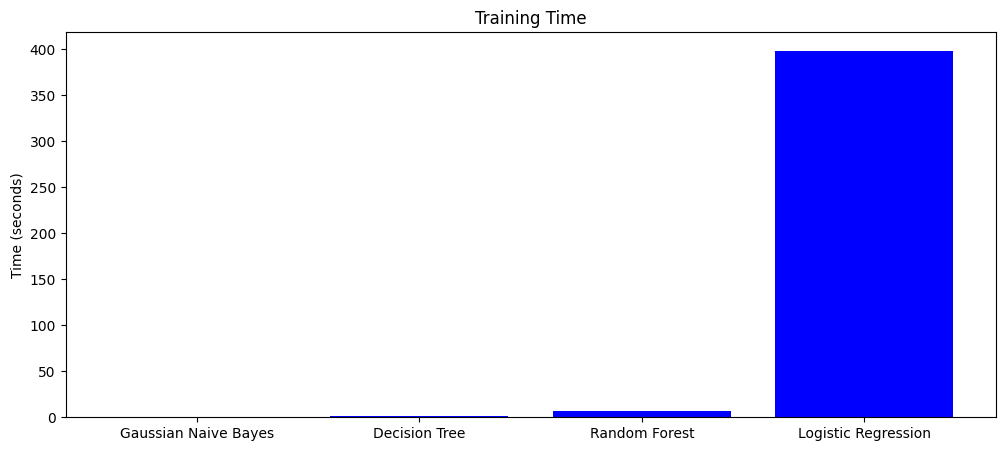

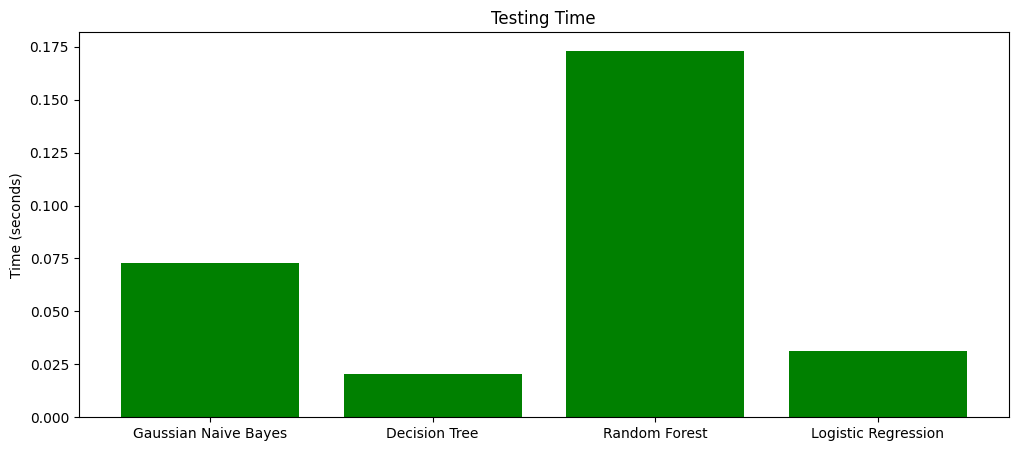

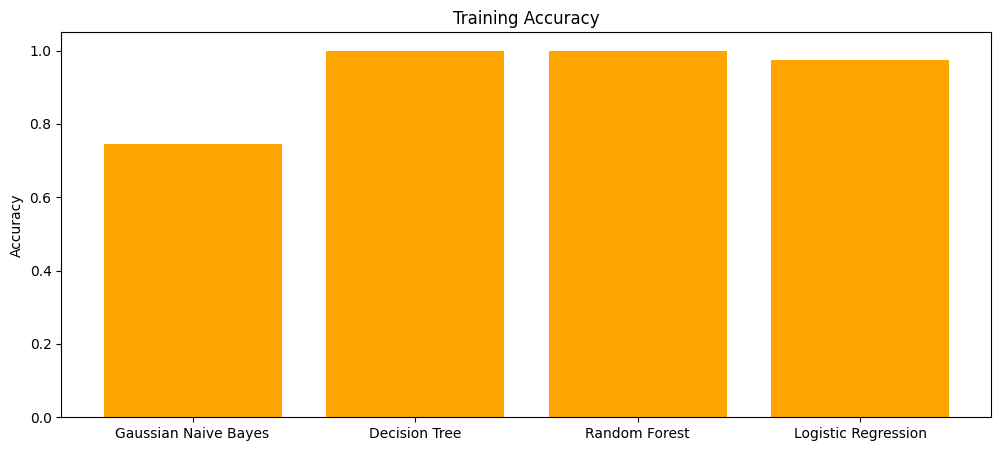

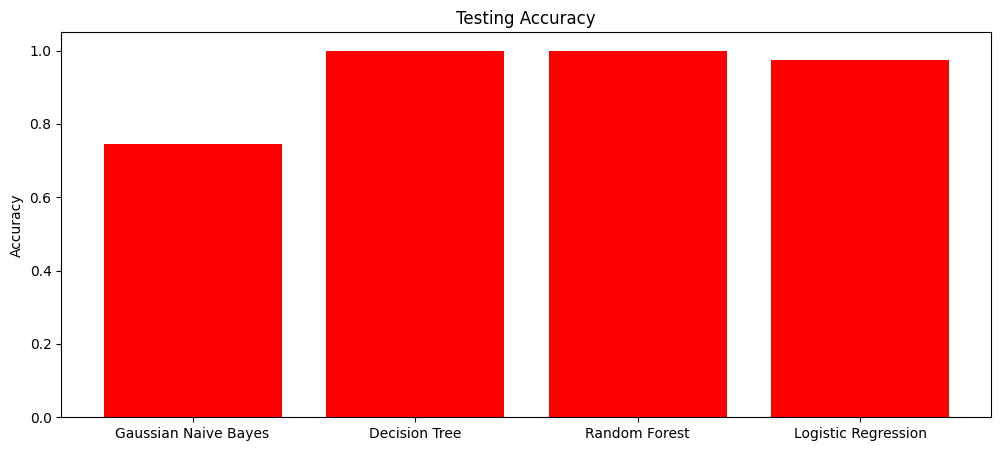

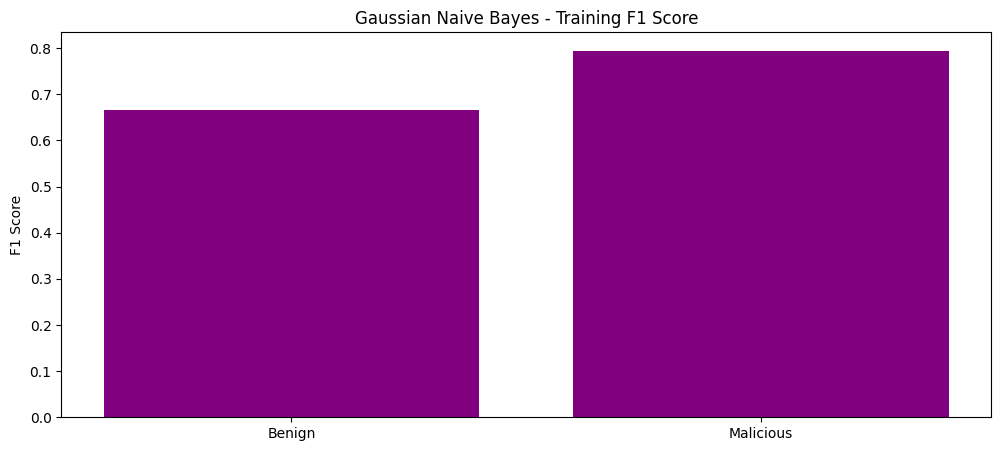

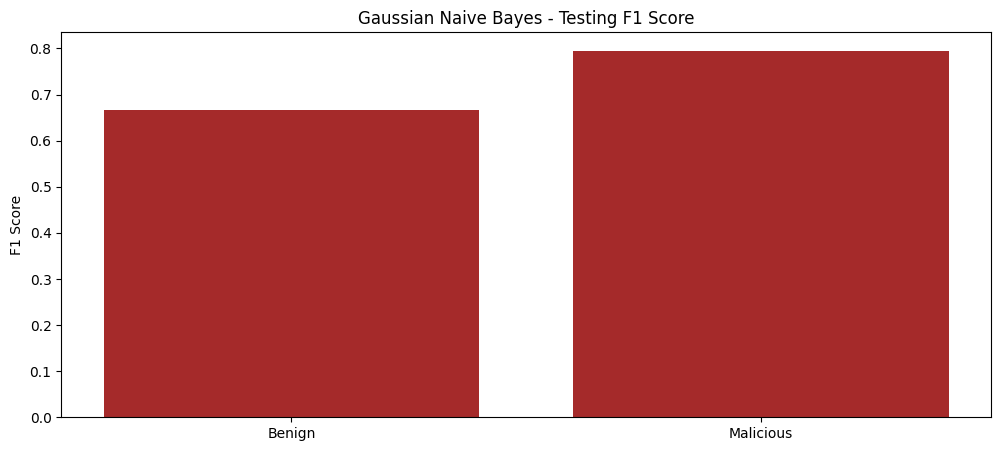

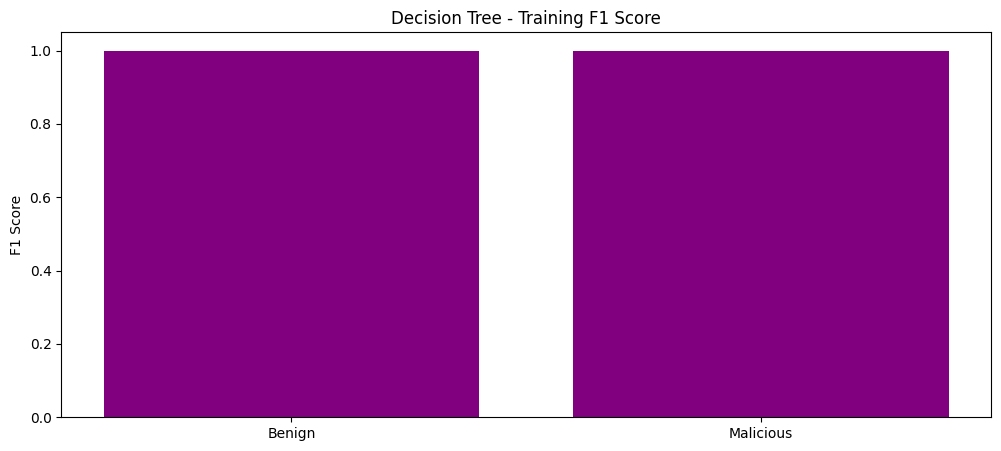

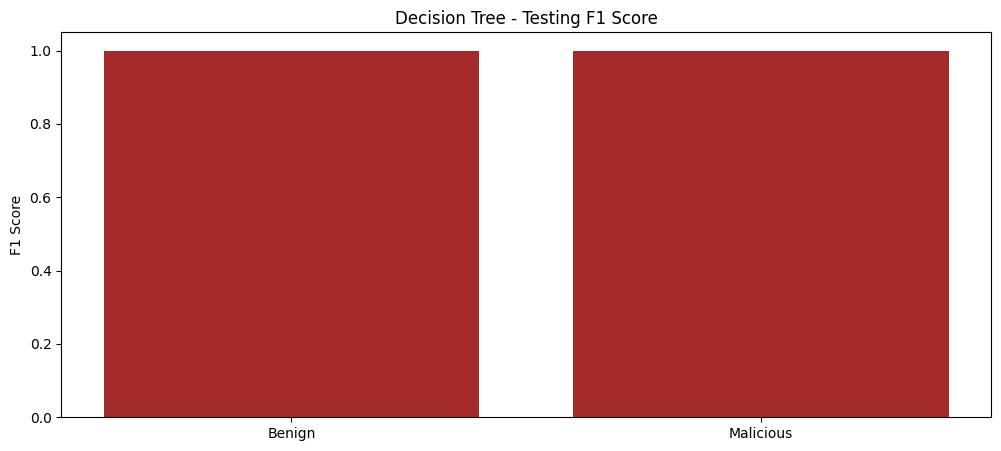

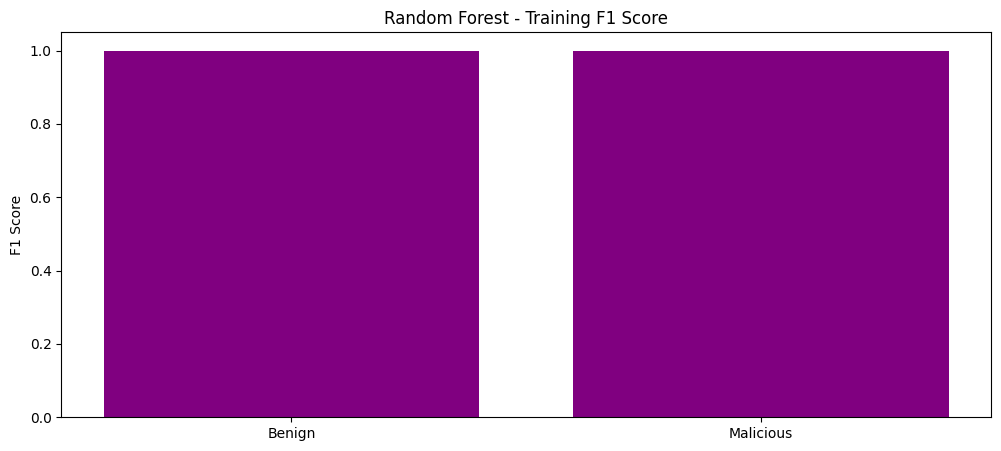

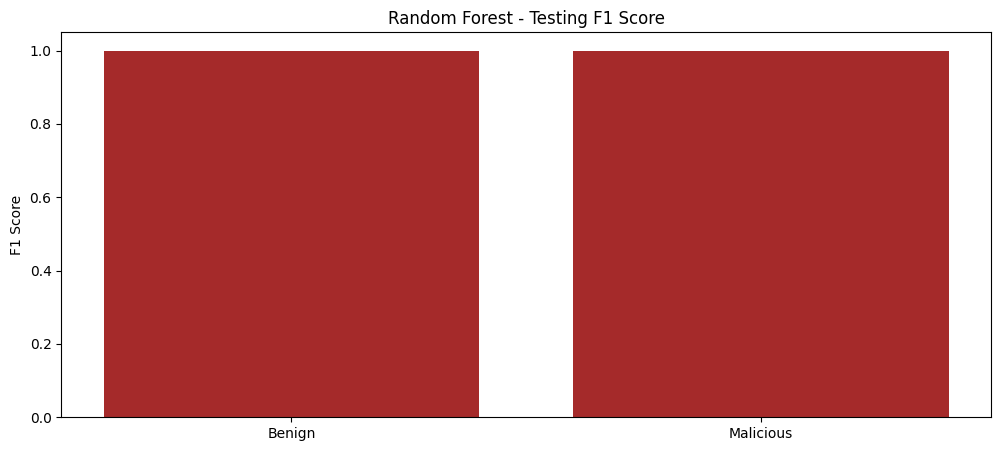

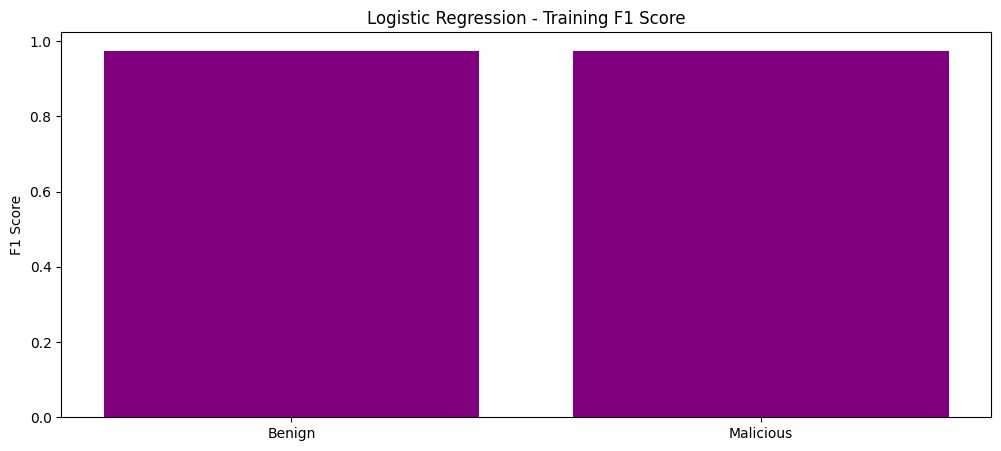

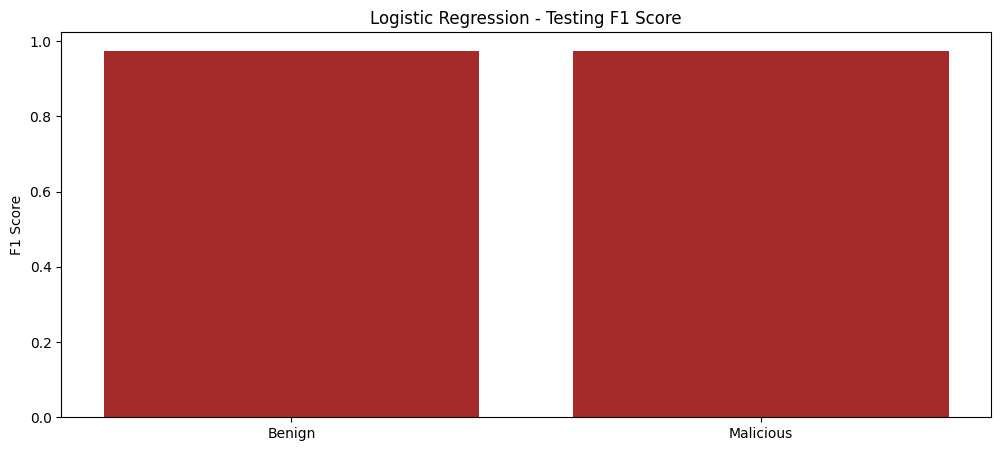

<Figure size 640x480 with 0 Axes>

In [163]:
# Plot training time of each model
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.bar(model_names, training_times, color='blue')
ax1.set_title('Training Time')
ax1.set_ylabel('Time (seconds)')

plt.show()

# Plot testing time of each model
fig, ax2 = plt.subplots(figsize=(12,5))
ax2.bar(model_names, testing_times, color='green')
ax2.set_title('Testing Time')
ax2.set_ylabel('Time (seconds)')

plt.show()

# Plot training score of each model
fig, ax3 = plt.subplots(figsize=(12,5))
ax3.bar(model_names, training_accuracies, color='orange')
ax3.set_title('Training Accuracy')
ax3.set_ylabel('Accuracy')

plt.show()

# Plot testing score of each model
fig, ax4 = plt.subplots(figsize=(12,5))
ax4.bar(model_names, testing_accuracies, color='red')
ax4.set_title('Testing Accuracy')
ax4.set_ylabel('Accuracy')

plt.show()

# Add subplots for F1 scores
for i, model_name in enumerate(model_names):
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(["Benign", "Malicious"], training_f1_scores[i], color='purple')
    ax.set_title(f'{model_name} - Training F1 Score')
    ax.set_ylabel('F1 Score')
    plt.show()

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(["Benign", "Malicious"], testing_f1_scores[i], color='brown')
    ax.set_title(f'{model_name} - Testing F1 Score')
    ax.set_ylabel('F1 Score')
    plt.show()

plt.tight_layout()
plt.show()
